<a href="https://colab.research.google.com/github/KamilShape/credit_risk_analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction and data load.

###1.1 Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2 Database analysis

Database link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [3]:
loan = pd.read_csv("/content/drive/MyDrive/loan.csv")

<ipython-input-3-09ca7cbc1256>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("/content/drive/MyDrive/loan.csv")


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data preprocessing

### 2.1 Selecting relevant columns

In [5]:
loan2 = loan[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'emp_length', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status', 'loan_status']]

In [6]:
loan2.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status
0,5000.0,36 months,10.65,162.87,B,RENT,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,NaN,NaN,Verified,Fully Paid
1,2500.0,60 months,15.27,59.83,C,RENT,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Charged Off
2,2400.0,36 months,15.96,84.33,C,RENT,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,NaN,NaN,Not Verified,Fully Paid
3,10000.0,36 months,13.49,339.31,C,RENT,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Fully Paid
4,3000.0,60 months,12.69,67.79,B,RENT,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Current


In [7]:
loan2['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

### 2.2 Removing NaN values

In [8]:
loan2.fillna(0, inplace = True)

<ipython-input-8-81e18bd3abfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.fillna(0, inplace = True)


In [9]:
#checking null values
np.sum(loan2.isnull().any(axis=1))

0

### 2.3 Spliting loan_status into 3 categories
* 'Low' - low risk (Issued, Current, Does not meet the credit policy: Status:Fully Paid, Fully Paid)
* 'Medium' - medium risk (In Grace Period, Late (16-30 days), Late (31-120 days))
* 'High' - high risk (Charged Off ,Does not meet the credit policy. Status:Charged Off, Default)






In [10]:
loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'
loan2.loc[loan2['loan_status'].isin(['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']), 'loan_risk'] = 'Medium'
loan2.loc[loan2['loan_status'].isin(['Charged Off' , 'Does not meet the credit policy. Status:Charged Off', 'Default']), 'loan_risk'] = 'High'

<ipython-input-10-8fe3149f6cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'


2.4 Spliting home_ownership into 4 categories


*   'MORTGAGE' - MORTGAGE
*   'RENT' - RENT
*   'OWN' - OWN
*   'OTHER' - OTHER, NONE, ANY 

In [11]:
loan2['home_ownership'] = loan2['home_ownership'].str.replace('NONE', "OTHER")
loan2['home_ownership'] = loan2['home_ownership'].str.replace('ANY', "OTHER")

<ipython-input-11-d07d7a7148e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['home_ownership'] = loan2['home_ownership'].str.replace('NONE', "OTHER")
<ipython-input-11-d07d7a7148e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['home_ownership'] = loan2['home_ownership'].str.replace('ANY', "OTHER")


#3. Data visualisation

### 3.1 Data Visualisation for loan risk

In [12]:
avg_loan_amnt_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['loan_amnt'].mean().reset_index())

In [13]:
avg_rate_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['int_rate'].mean().reset_index())

In [14]:
avg_dti_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['dti'].mean().reset_index())

In [15]:
avg_installment_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['installment'].mean().reset_index())

In [16]:
#cleaning emp_length columns
loan2['emp_length'] = loan2['emp_length'].str.replace('year', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('s', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('< 1', "0.5")
loan2['emp_length'] = loan2['emp_length'].str.replace('+', "")
loan2['emp_length'] = loan2['emp_length'].str.replace(' ', "")
loan2['emp_length'] = loan2['emp_length'].astype('float')

<ipython-input-16-8f7e445ed3f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['emp_length'] = loan2['emp_length'].str.replace('year', "")
<ipython-input-16-8f7e445ed3f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['emp_length'] = loan2['emp_length'].str.replace('s', "")
<ipython-input-16-8f7e445ed3f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [17]:
avg_emp_length_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['emp_length'].mean().reset_index())

In [18]:
avg_emp_length_by_loan_risk['emp_length'] = avg_emp_length_by_loan_risk['emp_length'].round()

In [19]:
avg_annual_inc_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['annual_inc'].mean().reset_index())

In [20]:
avg_annual_inc_by_loan_risk

,loan_risk,annual_inc
0,High,65199.766809
1,Low,75660.675169
2,Medium,72292.485413


In [21]:
graph_data = pd.merge(pd.merge(avg_loan_amnt_by_loan_risk, avg_rate_by_loan_risk,  on='loan_risk'), avg_dti_by_loan_risk,  on='loan_risk',  how='inner')

In [22]:
graph_data = pd.merge(pd.merge(graph_data, avg_installment_by_loan_risk, on='loan_risk'), avg_emp_length_by_loan_risk, on='loan_risk', how='inner')

In [23]:
graph_data = graph_data.merge(avg_annual_inc_by_loan_risk, on = 'loan_risk')

In [24]:
graph_data['order'] = [2,0,1]

In [25]:
graph_data.sort_values(by = 'order', inplace=True)

In [26]:
loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])

<ipython-input-26-5c15275ff2c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])


In [27]:
#graph functions
def bar_chart(ax, x, y, color, title, ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

def double_bar_chart(ax, x, y1, y2, width, label1, label2, color1, color2, title):
  ax.bar(x - width/2, y1, width, label=label1, color=color1)
  ax.bar(x + width/2, y2, width, label=label2, color=color2)
  ax.set_title(title)
  ax.legend()

def triple_bar_chart(ax, x, y1, y2, y3, width, label1, label2, label3, color1, color2, color3, title):
  ax.bar(x - width, y1, width, label=label1, color=color1)
  ax.bar(x, y2, width, label=label2, color=color2)
  ax.bar(x + width, y3, width, label=label3, color=color3)
  ax.set_title(title)
  ax.legend()

def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

<ipython-input-28-cac68affaea3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


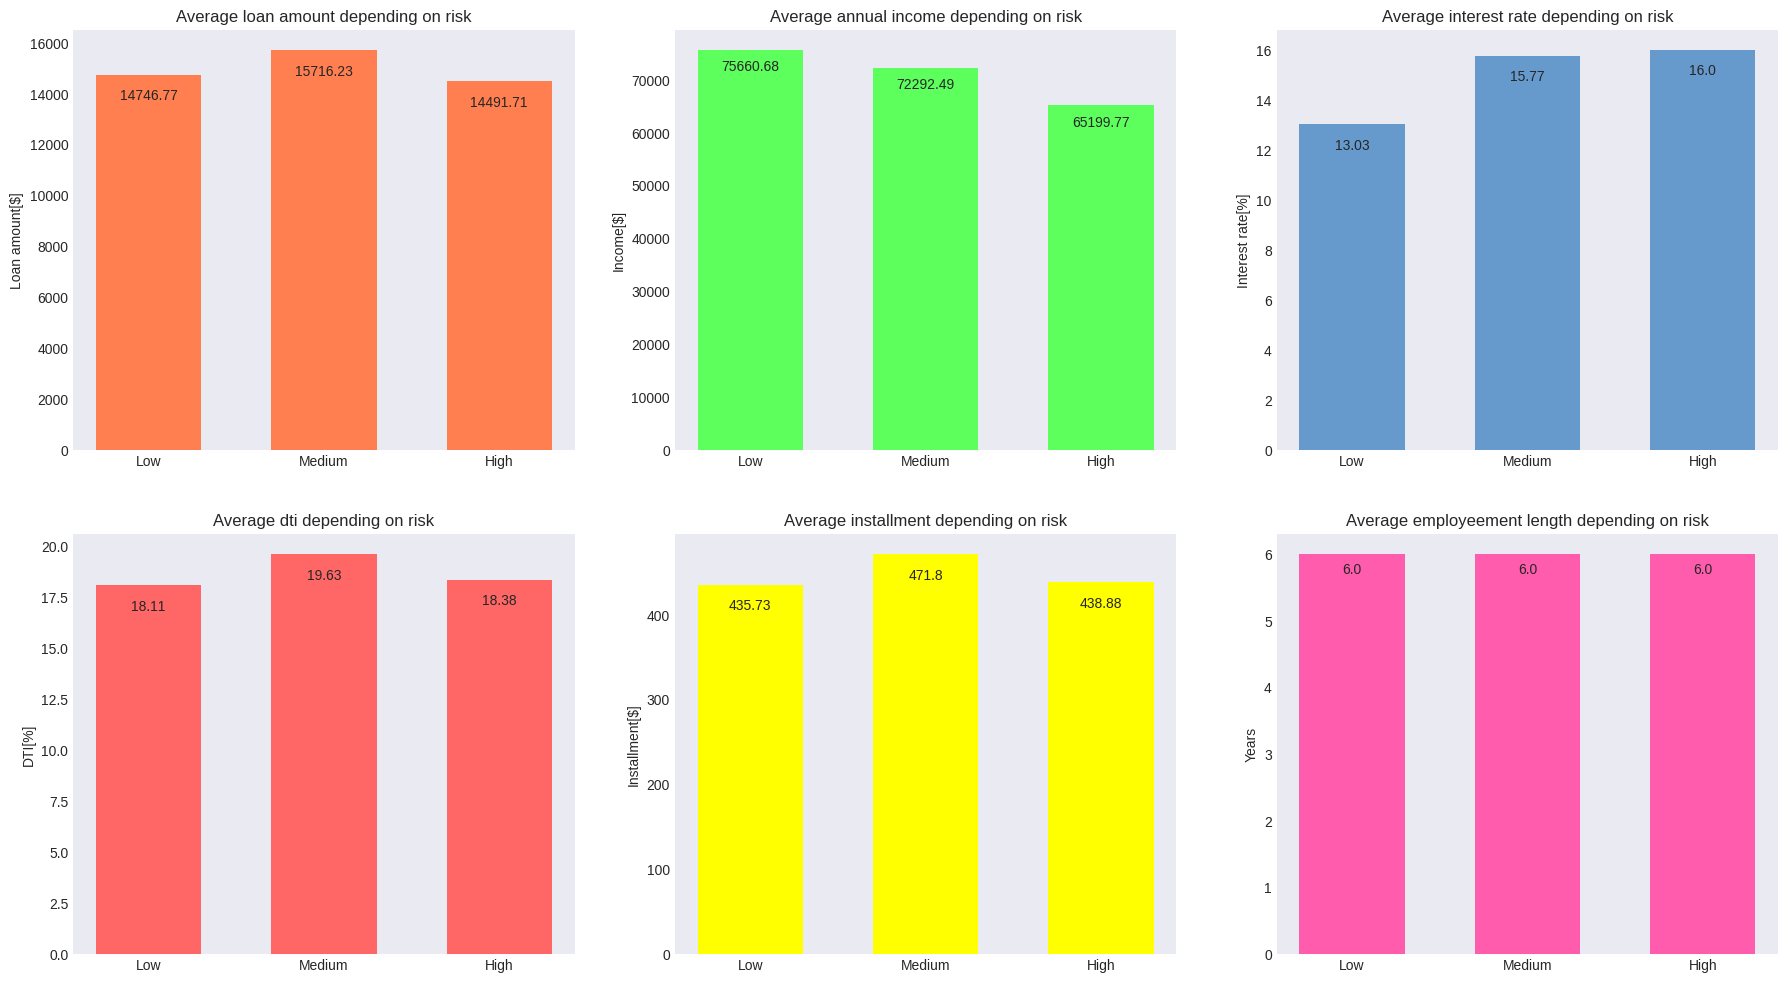

In [28]:
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(2,3, figsize = (22,12))

#charts
bar_chart(ax[0,0], graph_data['loan_risk'], graph_data['loan_amnt'], '#FF7F50', 'Average loan amount depending on risk', 'Loan amount[$]')
bar_chart(ax[0,1], graph_data['loan_risk'], graph_data['annual_inc'], '#5CFF5C', 'Average annual income depending on risk', 'Income[$]')
bar_chart(ax[0,2], graph_data['loan_risk'], graph_data['int_rate'], '#6699CC', 'Average interest rate depending on risk', 'Interest rate[%]')
bar_chart(ax[1,0], graph_data['loan_risk'], graph_data['dti'], '#FF6666', 'Average dti depending on risk', 'DTI[%]')
bar_chart(ax[1,1], graph_data['loan_risk'], graph_data['installment'], '#FFFF00', 'Average installment depending on risk', 'Installment[$]' )
bar_chart(ax[1,2], graph_data['loan_risk'], graph_data['emp_length'], '#FF5CAD', 'Average employeement length depending on risk', 'Years')

#text
add_text(ax[0,0], graph_data['loan_risk'], graph_data['loan_amnt'], 1000, 0)
add_text(ax[0,1], graph_data['loan_risk'], graph_data['annual_inc'], 4000, 0)
add_text(ax[0,2], graph_data['loan_risk'], graph_data['int_rate'], 1, 0)
add_text(ax[1,0], graph_data['loan_risk'], graph_data['dti'], 1.25, 0)
add_text(ax[1,1], graph_data['loan_risk'], graph_data['installment'], 30, 0)
add_text(ax[1,2], graph_data['loan_risk'], graph_data['emp_length'], 0.3, 0)

In [29]:
#term values by loan term
months_36 = loan2[loan2['term'] == ' 36 months']
months_60 = loan2[loan2['term'] == ' 60 months']

In [30]:
#counting values by loan term
ver = loan2[loan2['verification_status'] == 'Verified']
source_ver = loan2[loan2['verification_status'] == 'Source Verified']
not_ver = loan2[loan2['verification_status'] == 'Not Verified']

In [31]:
#counting values by home ownership
rent = loan2[loan2['home_ownership'] == 'RENT']
own = loan2[loan2['home_ownership'] == 'OWN']
mortgage = loan2[loan2['home_ownership'] == 'MORTGAGE']
other = loan2[loan2['home_ownership'] == 'OTHER']

In [32]:
#iterest rates ranges
loan_int_range_df = pd.DataFrame(loan2['int_range'].value_counts()).reset_index().sort_values(by='index')

<ipython-input-33-dd7a710175bb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])
<ipython-input-33-dd7a710175bb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])
<ipython-input-33-dd7a710175bb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels([' ','Low',' ','Medium',' ','High'])


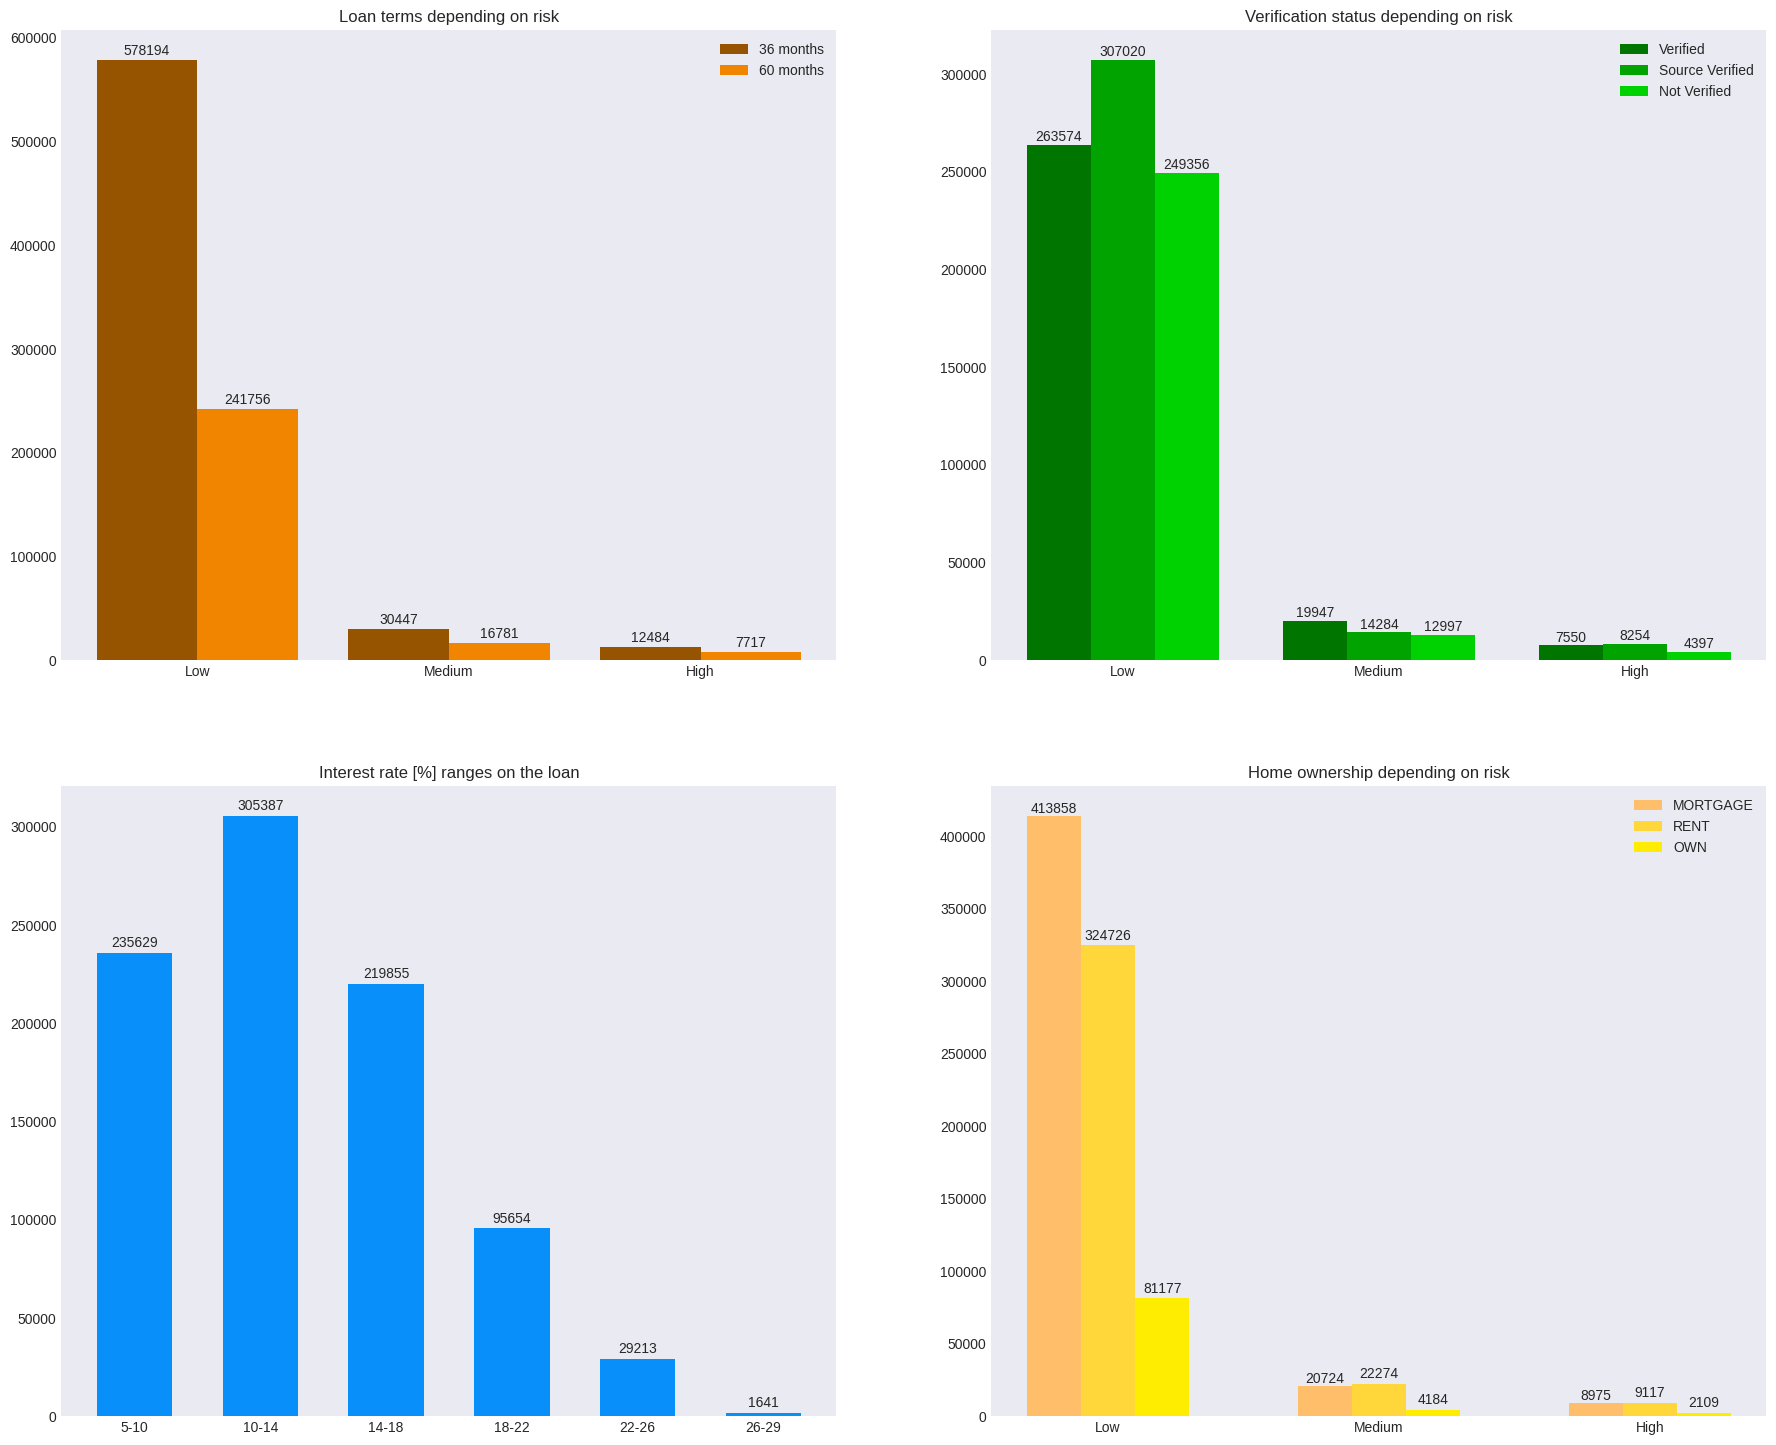

In [33]:
fig, ax = plt.subplots(2,2, figsize = (22,18))
X = ['Low', 'Medium', 'High']
X_axis = np.arange(len(X))

#Terms depending on risk
double_bar_chart(ax[0,0], X_axis, months_36['loan_risk'].value_counts().values, months_60['loan_risk'].value_counts().values, 0.4, '36 months', '60 months', '#965300', '#F28500', 'Loan terms depending on risk')
ax[0,0].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])

#Verification status depending on risk
triple_bar_chart(ax[0,1], X_axis, ver['loan_risk'].value_counts().values, source_ver['loan_risk'].value_counts().values, not_ver['loan_risk'].value_counts().values, 0.25, 
                     'Verified', 'Source Verified', 'Not Verified', '#007500', '#00A300', '#00D100', 'Verification status depending on risk')
ax[0,1].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])

# Interest Rate on the loan
bar_chart(ax[1,0], loan_int_range_df['index'], loan_int_range_df['int_range'], '#088FFA', 'Interest rate [%] ranges on the loan', '')

# #Home ownership depending on risk
triple_bar_chart(ax[1,1], X_axis, mortgage['loan_risk'].value_counts().values, rent['loan_risk'].value_counts().values, own['loan_risk'].value_counts().values, 0.2, 
                     'MORTGAGE', 'RENT', 'OWN', '#FFBE6A', '#FFD73B', '#FFED01', 'Home ownership depending on risk')
ax[1,1].set_xticklabels([' ','Low',' ','Medium',' ','High'])

# #text
add_text(ax[0,0], X_axis , months_36['loan_risk'].value_counts().values, -5000, 0, move_x = -0.2)
add_text(ax[0,0], X_axis , months_60['loan_risk'].value_counts().values, -5000, 0, move_x = 0.2)
add_text(ax[0,1], X_axis , ver['loan_risk'].value_counts().values, -2000, 0, move_x = -0.25)
add_text(ax[0,1], X_axis , source_ver['loan_risk'].value_counts().values, -2000, 0, move_x = 0.0)
add_text(ax[0,1], X_axis , not_ver['loan_risk'].value_counts().values, -2000, 0, move_x = 0.25)
add_text(ax[1,0], loan_int_range_df['index'], loan_int_range_df['int_range'], -3000, 0)
add_text(ax[1,1], X_axis, mortgage['loan_risk'].value_counts().values, -2000, 0, move_x = -0.2)
add_text(ax[1,1], X_axis, own['loan_risk'].value_counts().values, -4000, 0, move_x = 0.2)
add_text(ax[1,1], X_axis, rent['loan_risk'].value_counts().values, -4000, 0)

# 4. Changing cat_columns into category

In [57]:
cat_loan = loan2.copy()

In [58]:
cat_loan

,loan_amnt,term,int_rate,installment,grade,home_ownership,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status,loan_risk,int_range
0,5000.0,36 months,10.65,162.87,B,RENT,10.0,24000.0,credit_card,27.65,0.0,INDIVIDUAL,0.0,0.0,Verified,Fully Paid,Low,10-14
1,2500.0,60 months,15.27,59.83,C,RENT,0.5,30000.0,car,1.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Charged Off,High,14-18
2,2400.0,36 months,15.96,84.33,C,RENT,10.0,12252.0,small_business,8.72,0.0,INDIVIDUAL,0.0,0.0,Not Verified,Fully Paid,Low,14-18
3,10000.0,36 months,13.49,339.31,C,RENT,10.0,49200.0,other,20.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Fully Paid,Low,10-14
4,3000.0,60 months,12.69,67.79,B,RENT,1.0,80000.0,other,17.94,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Current,Low,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,RENT,8.0,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,Low,10-14
887375,24000.0,36 months,11.99,797.03,B,MORTGAGE,10.0,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,Low,10-14
887376,13000.0,60 months,15.99,316.07,D,RENT,5.0,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,Low,14-18
887377,12000.0,60 months,19.99,317.86,E,RENT,1.0,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,0.0,0.0,Source Verified,Current,Low,18-22


In [59]:
cat_columns = ['term', 'grade', 'home_ownership', 'purpose', 'application_type', 'verification_status', 'loan_status', 'loan_risk']

In [60]:
for cat in cat_columns:
  cat_loan[cat] = cat_loan[cat].astype('category')
  cat_loan[cat] = cat_loan[cat].cat.codes

In [61]:
cat_loan.drop('int_range', axis=1, inplace=True)

In [62]:
cat_loan

,loan_amnt,term,int_rate,installment,grade,home_ownership,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status,loan_risk
0,5000.0,0,10.65,162.87,1,3,10.0,24000.0,1,27.65,0.0,0,0.0,0.0,2,5,1
1,2500.0,1,15.27,59.83,2,3,0.5,30000.0,0,1.00,0.0,0,0.0,0.0,1,0,0
2,2400.0,0,15.96,84.33,2,3,10.0,12252.0,11,8.72,0.0,0,0.0,0.0,0,5,1
3,10000.0,0,13.49,339.31,2,3,10.0,49200.0,9,20.00,0.0,0,0.0,0.0,1,5,1
4,3000.0,1,12.69,67.79,1,3,1.0,80000.0,9,17.94,0.0,0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,0,11.99,332.10,1,3,8.0,31000.0,2,28.69,0.0,0,0.0,0.0,2,1,1
887375,24000.0,0,11.99,797.03,1,0,10.0,79000.0,4,3.90,0.0,0,0.0,0.0,2,1,1
887376,13000.0,1,15.99,316.07,3,3,5.0,35000.0,2,30.90,0.0,0,0.0,0.0,2,1,1
887377,12000.0,1,19.99,317.86,4,3,1.0,64400.0,2,27.19,1.0,0,0.0,0.0,1,1,1
